# Project 1 - Microlensing 1
# Brandon Shane, Ina Park, Toshan Vysyraju, Arya Lakshmanan

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

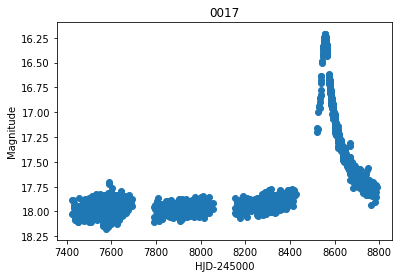

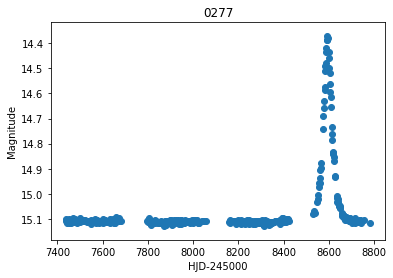

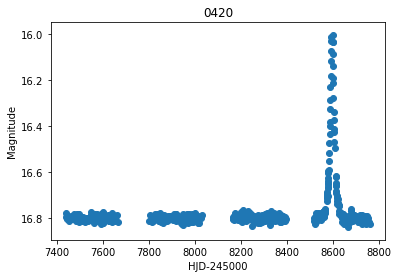

In [2]:
# _locs = ['OGLE-2019-BLG-/blg-0017/',]
data = {}
names = ['0017','0277','0420']

for name in names:
    d = np.loadtxt('OGLE-2019-BLG-'+name+'/blg-'+name+'/phot.dat', dtype=float)
    x = d[:,0] - 245e4
    y = d[:,1]
    
    plt.scatter(x,y)
    plt.gca().invert_yaxis()
    plt.title(name)
    plt.xlabel('HJD-245000')
    plt.ylabel('Magnitude')
    plt.show()

    
    data[name] = d
    


In [3]:
d = data[name]
x = d[:,0] - 245e4
y = d[:,1]
s = d[:,2]


# plt.scatter(x,y)
# plt.gca().invert_yaxis()
# # m = [22.5 mag] – 2.5 log10 f.
m = y
m -= 22.5
m /= -2.5
m **= 10
y = m

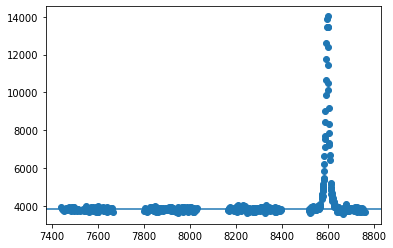

In [4]:
plt.scatter(x,y)
f_src_guess = np.nanmean(y[(x>7400) & (x<8400)])
plt.axhline(y=f_src_guess)

In [5]:
def xi(param):
    'X^2 to mininize to find parameters'
    umin,tE,fs = param 
    
    u = np.sqrt(umin**2 + (x/tE)**2)
    A = u**2 + 2
    A /= (u*np.sqrt(u+4))
    
    
    tot = 0
    for i in range(len(y)):
        tot += ((y[i]/fs - A[i])**2)/s[i]**2 
    return tot

In [6]:
opt = optimize.fmin(xi,[0.1,500,f_src_guess])
opt = np.array(opt)  


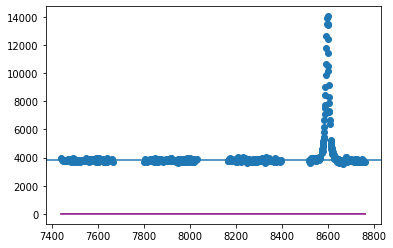

In [7]:
plt.scatter(x,y)
# f_src_guess = np.nanmean(y[(x>7400) & (x<8400)])
plt.axhline(y=f_src_guess)

umin,tE = 0.036,421.250

u = np.sqrt(umin**2 + (x/tE)**2)
A = (u**2 + 2)/(u*np.sqrt(u+4))
# A 

plt.plot(x,A,color='purple')